In [ ]:
# Анализ данных рекламной компании банка

In [1]:
import pandas as pd
import requests, zipfile, io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
r = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip')
if r.status_code == 200:
    z = zipfile.ZipFile(io.BytesIO(r.content))

In [3]:
z.namelist()

['bank-full.csv', 'bank-names.txt', 'bank.csv']

In [4]:
df = pd.read_csv(z.open("bank-full.csv"), sep = ";")
df.sample (n=10)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
18870,35,technician,divorced,secondary,no,-281,no,no,cellular,4,aug,148,1,-1,0,unknown,no
15114,30,services,divorced,secondary,no,21,no,no,cellular,17,jul,49,1,-1,0,unknown,no
15241,56,management,married,tertiary,no,171,no,yes,telephone,17,jul,610,2,-1,0,unknown,no
41665,48,management,married,tertiary,no,3842,no,no,cellular,1,oct,168,1,122,2,success,no
20562,41,technician,divorced,secondary,no,1631,yes,no,cellular,12,aug,173,2,-1,0,unknown,no
39348,31,blue-collar,single,secondary,no,1124,yes,no,cellular,18,may,82,4,-1,0,unknown,no
18623,35,technician,divorced,unknown,no,-11,yes,yes,cellular,31,jul,24,18,-1,0,unknown,no
22595,46,housemaid,married,primary,no,304,no,no,cellular,22,aug,166,5,-1,0,unknown,no
7039,31,blue-collar,single,unknown,no,667,yes,no,unknown,28,may,80,3,-1,0,unknown,no
41185,34,self-employed,single,tertiary,no,9962,no,no,cellular,20,aug,474,1,-1,0,unknown,yes


In [5]:
plt.style.use ('fivethirtyeight')

In [6]:
df["month"] = pd.to_datetime(df["month"], format= '%b').dt.month
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,11,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,11,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,11,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,11,508,4,-1,0,unknown,no


In [7]:
data = df.groupby('month')['job'].agg(count = 'count').reset_index().sort_values(by = 'month')
data.head()

,month,count
0,1,1403
1,2,2649
2,3,477
3,4,2932
4,5,13766


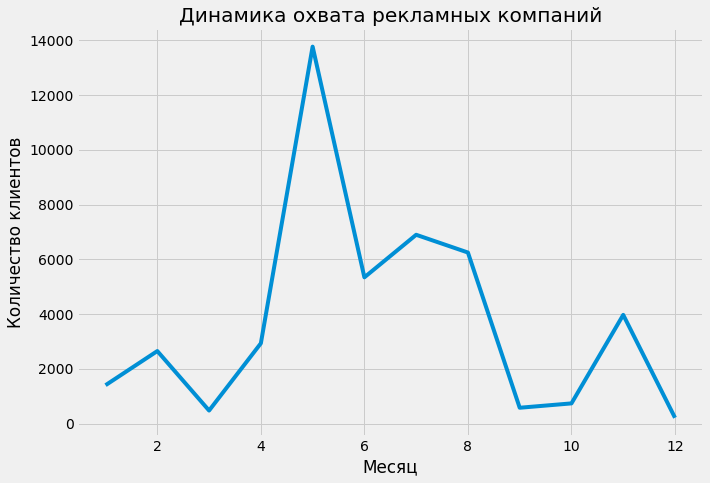

In [8]:
plt.figure(figsize = (10,7))

plt.plot(data['month'], data['count'])

plt.title('Динамика охвата рекламных компаний')
plt.xlabel('Месяц')
plt.ylabel('Количество клиентов')

plt.show()

In [9]:
data1 = df.query('marital == "single"').groupby('month')['job'].agg(count = 'count').reset_index().sort_values(by = 'month')
data2 = df.query('marital == "married"').groupby('month')['job'].agg(count = 'count').reset_index().sort_values(by = 'month')
data1.head()
data2.head()

,month,count
0,1,699
1,2,1422
2,3,246
3,4,1744
4,5,7912


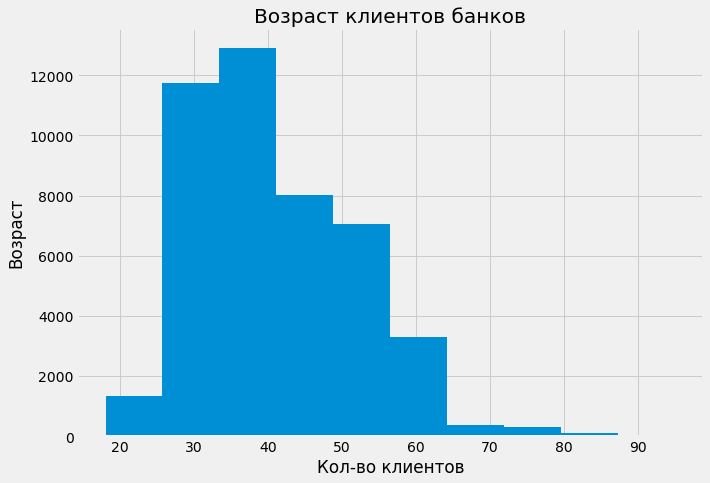

In [10]:
plt.figure(figsize = (10,7))

plt.hist(df['age'],bins = 10)


plt.title('Возраст клиентов банков')
plt.xlabel('Кол-во клиентов')
plt.ylabel('Возраст')


plt.show()

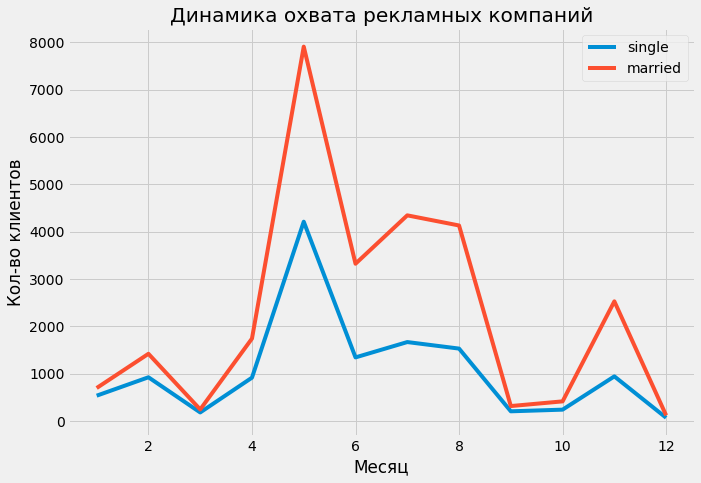

In [11]:
plt.figure(figsize = (10,7))

plt.plot(data1['month'], data1['count'])
plt.plot(data2['month'], data2['count'])

plt.title('Динамика охвата рекламных компаний')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов')
plt.legend(['single','married'])

plt.show()

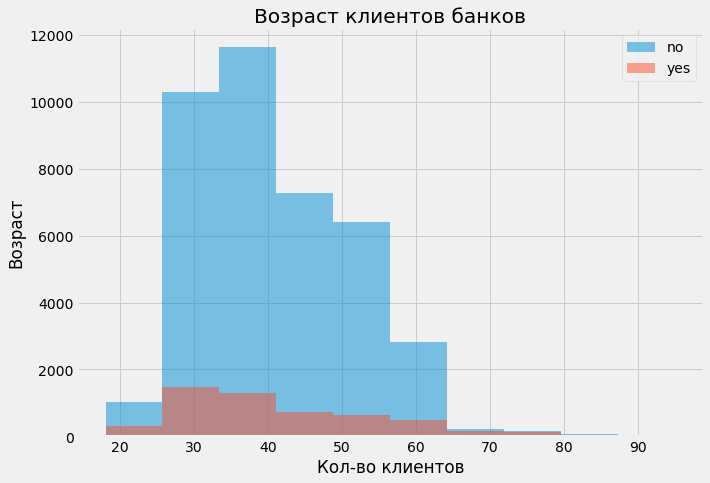

In [12]:
plt.figure(figsize = (10,7))


plt.hist(df['age'].loc[df['y'] == 'no'], alpha = 0.5, label = 'no')
plt.hist(df['age'].loc[df['y'] == 'yes'], alpha = 0.5, label = 'yes')

plt.title('Возраст клиентов банков')
plt.xlabel('Кол-во клиентов')
plt.ylabel('Возраст')
plt.legend()


plt.show()

In [13]:
df['convert'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [14]:
data = df.query('age <  30').groupby('age')['convert'].sum().reset_index()
data.head()

,age,convert
0,18,7
1,19,11
2,20,15
3,21,22
4,22,40


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


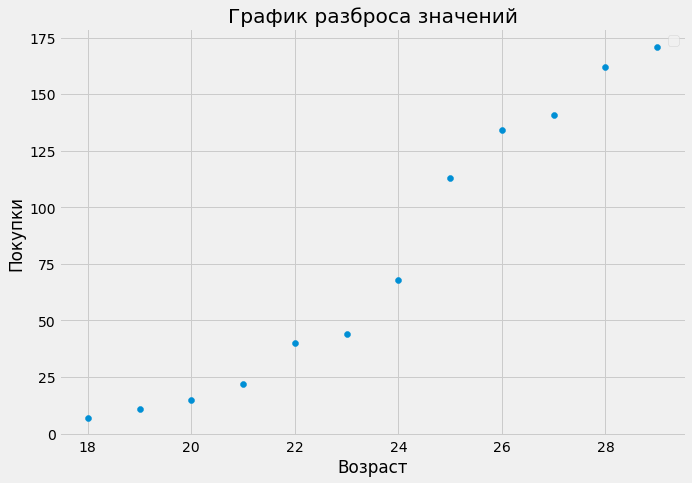

In [15]:
plt.figure(figsize = (10,7))


plt.scatter(data['age'], data['convert'])


plt.title('График разброса значений')
plt.xlabel('Возраст')
plt.ylabel('Покупки')
plt.legend()

plt.show()

In [16]:
data1 = df['duration'].loc[df['y']=='yes']
data2 = df['duration'].loc[df['y']=='no']
data1.head()

83     1042
86     1467
87     1389
129     579
168     673
Name: duration, dtype: int64

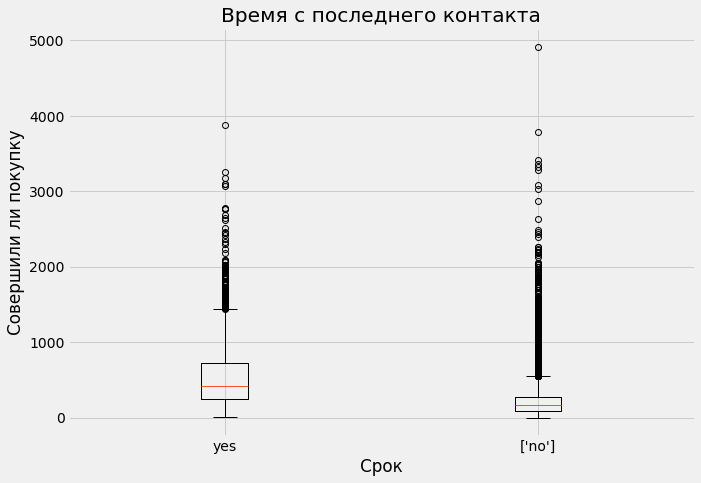

In [17]:
plt.figure(figsize = (10,7))


plt.boxplot([data1,data2])


plt.title('Время с последнего контакта')
plt.xlabel('Срок')
plt.ylabel('Совершили ли покупку')
plt.xticks([1,2],['yes',['no']])


plt.show()

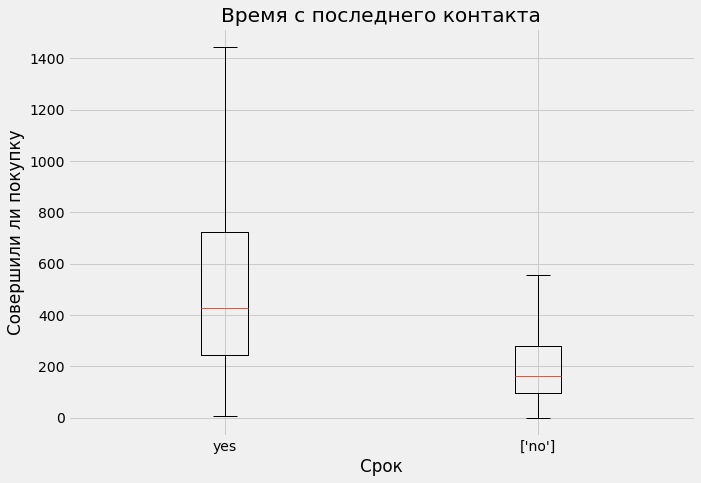

In [18]:
plt.figure(figsize = (10,7))


plt.boxplot([data1,data2],showfliers=False)


plt.title('Время с последнего контакта')
plt.xlabel('Срок')
plt.ylabel('Совершили ли покупку')
plt.xticks([1,2],['yes',['no']])


plt.show()

In [19]:
data = df['job'].value_counts().reset_index()
data.head()

,index,job
0,blue-collar,9732
1,management,9458
2,technician,7597
3,admin.,5171
4,services,4154


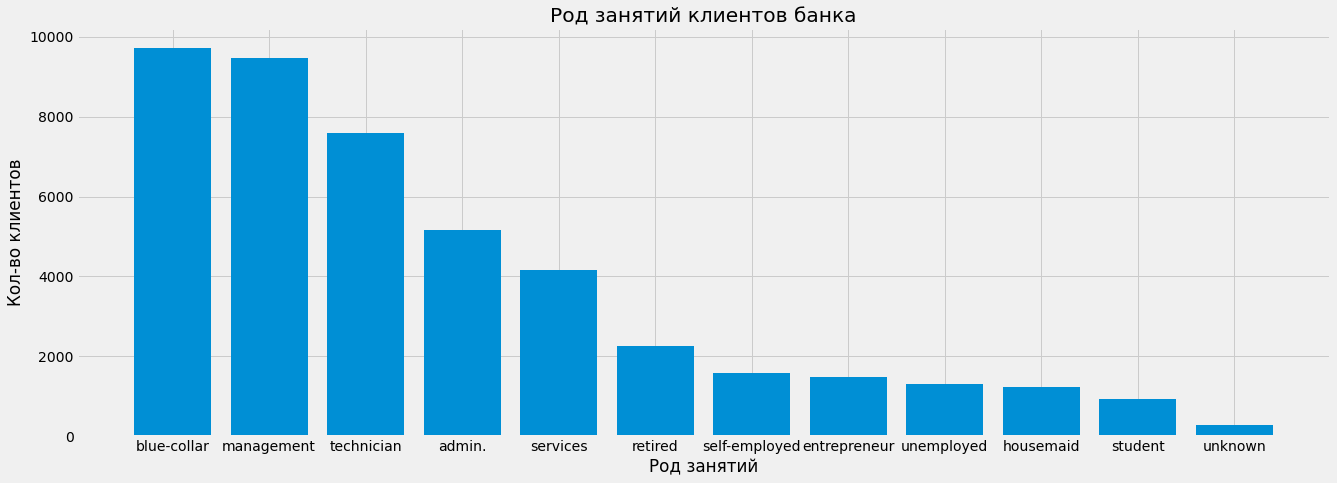

In [20]:
plt.figure(figsize = (20,7))

plt.bar(data['index'],data['job'])

plt.title('Род занятий клиентов банка')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во клиентов')


plt.show()

In [21]:
data = pd.crosstab(df['job'],df['y']).reset_index().sort_values(by = 'no', ascending= False)
data.head()

y,job,no,yes
1,blue-collar,9024,708
4,management,8157,1301
9,technician,6757,840
0,admin.,4540,631
7,services,3785,369


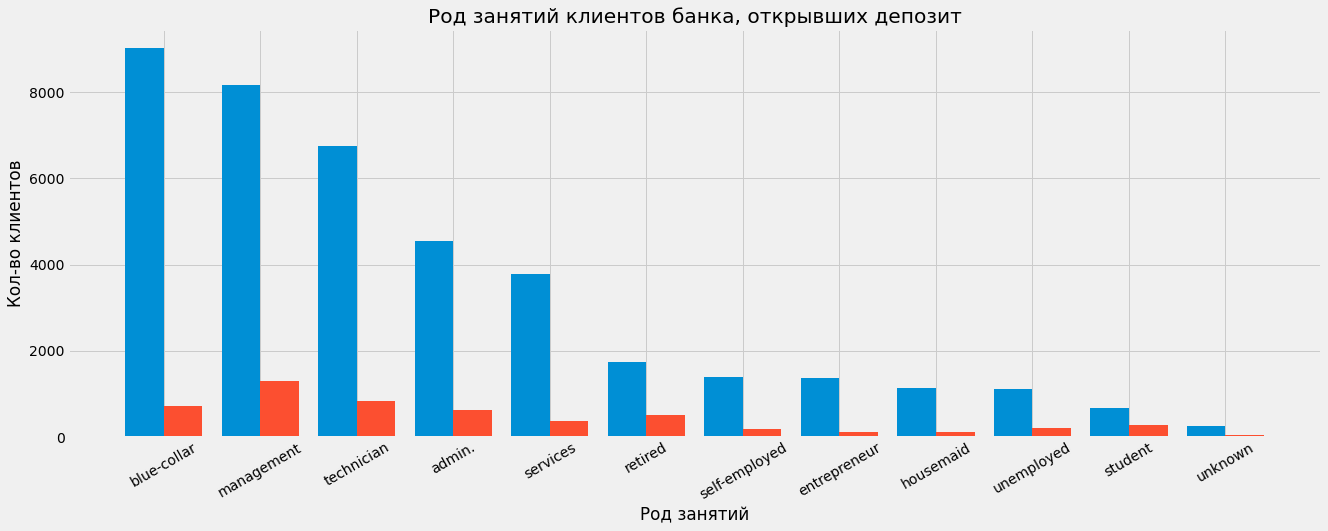

In [22]:
plt.figure(figsize = (20,7))
n_ticks = np.arange (len(data['no']))
offset = 0.2
w = 0.4
plt.bar(n_ticks - offset, data['no'], width = w)
plt.bar(n_ticks + offset, data['yes'], width = w)
plt.title('Род занятий клиентов банка, открывших депозит')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во клиентов')
plt.xticks(n_ticks, data['job'], rotation = 30)


plt.show()

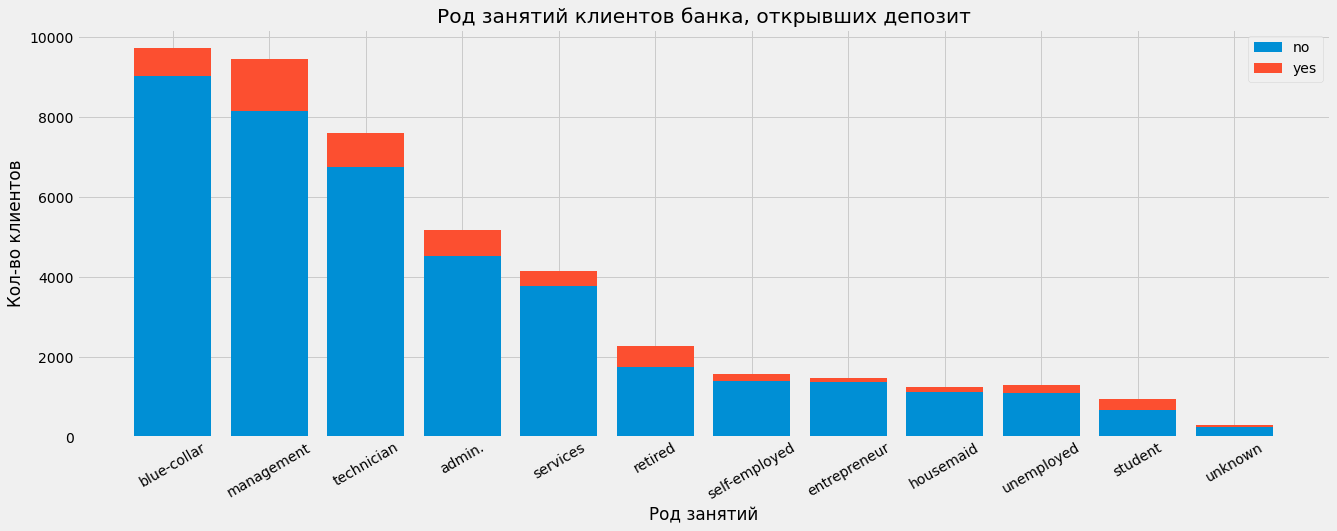

In [23]:
plt.figure(figsize = (20,7))

plt.bar(data['job'], data['no'])
plt.bar(data['job'], data['yes'], bottom = data['no'])

plt.title('Род занятий клиентов банка, открывших депозит')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во клиентов')
plt.legend(['no','yes'])
plt.xticks( rotation = 30)


plt.show()

In [24]:
data = pd.crosstab(df['job'],df['y'],normalize='index').reset_index().sort_values(by = 'no', ascending= False)
data.head()

y,job,no,yes
1,blue-collar,0.927250,0.072750
2,entrepreneur,0.917283,0.082717
3,housemaid,0.912097,0.087903
7,services,0.911170,0.088830
9,technician,0.889430,0.110570


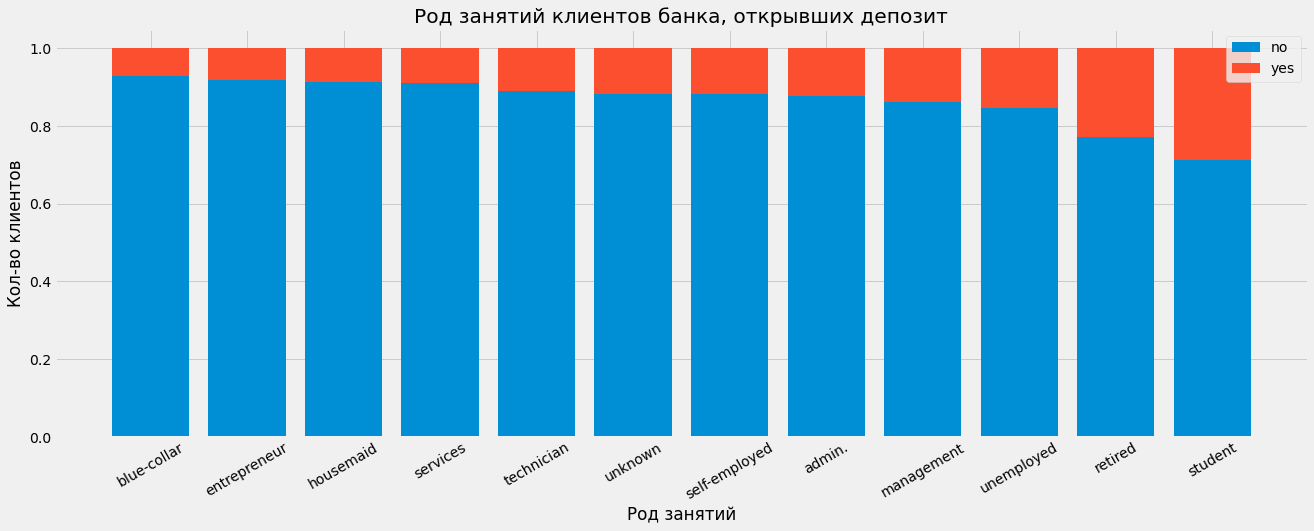

In [25]:
plt.figure(figsize = (20,7))

plt.bar(data['job'], data['no'])
plt.bar(data['job'], data['yes'], bottom = data['no'])

plt.title('Род занятий клиентов банка, открывших депозит')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во клиентов')
plt.legend(['no','yes'])
plt.xticks( rotation = 30)


plt.show()

In [26]:
data = df['y'].value_counts()
data

no     39922
yes     5289
Name: y, dtype: int64

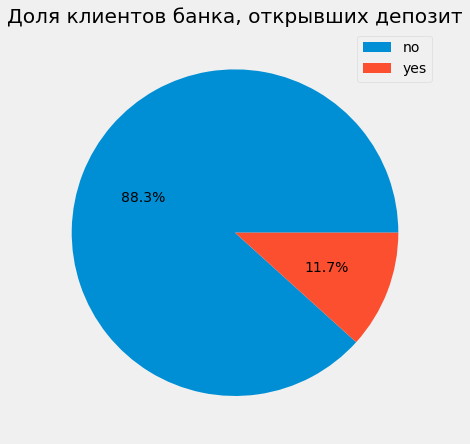

In [27]:
plt.figure(figsize = (20,7))
plt.pie(data, autopct = '%1.1f%%')
plt.title('Доля клиентов банка, открывших депозит')
plt.legend(data.index)
plt.show()

In [28]:
df = pd.read_csv('california_housing_train.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [29]:
correlation = df.corr()
correlation

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


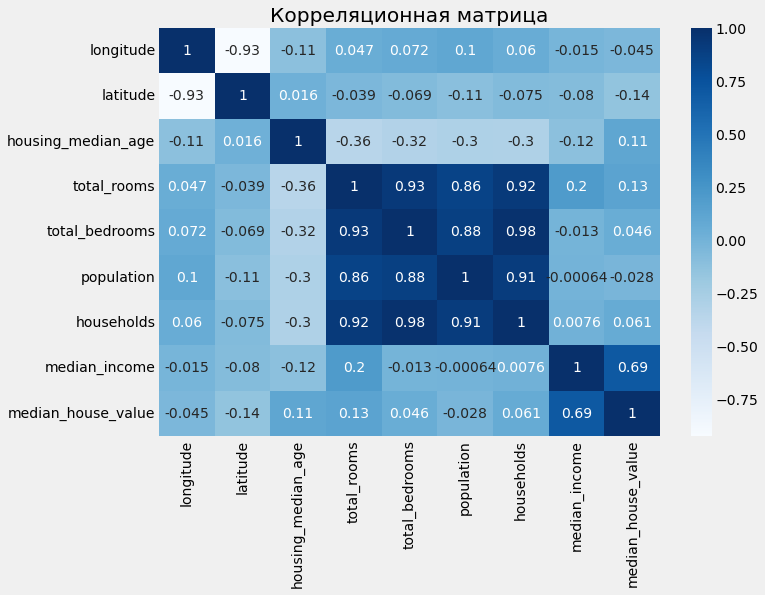

In [30]:
plt.figure(figsize = (10,7))
sns.heatmap(correlation, cmap = 'Blues', annot = True)
plt.title('Корреляционная матрица')
plt.show()

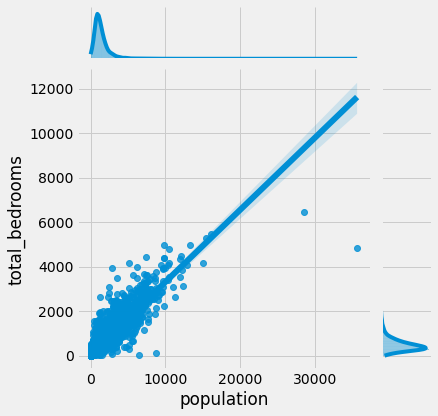

In [31]:
sns.jointplot(x=df['population'], y=df['total_bedrooms'], data=df, kind='reg')


In [32]:
data = df[['median_house_value','population','households', 'total_bedrooms']]
data.head()

,median_house_value,population,households,total_bedrooms
0,66900.0,1015.0,472.0,1283.0
1,80100.0,1129.0,463.0,1901.0
2,85700.0,333.0,117.0,174.0
3,73400.0,515.0,226.0,337.0
4,65500.0,624.0,262.0,326.0


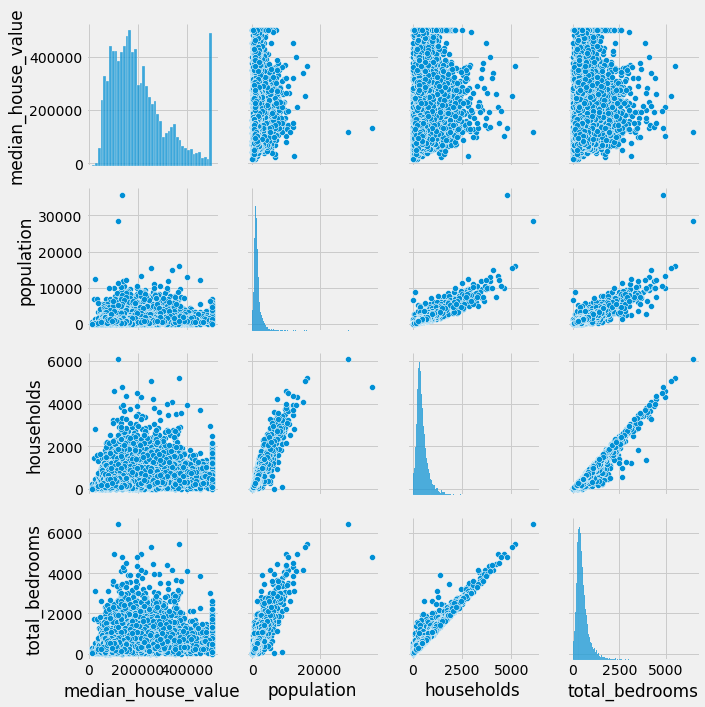

In [33]:
sns.pairplot(data)

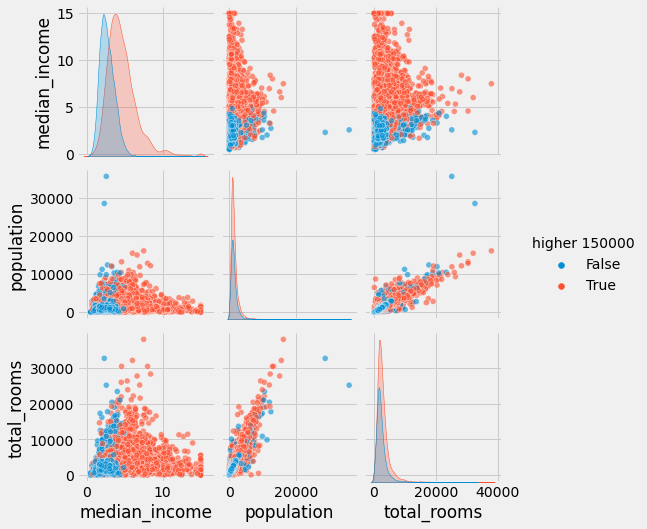

In [34]:
df['higher 150000'] = df['median_house_value'] > 150000
data = df[['higher 150000', 'median_income', 'population', 'total_rooms']]
data.head()

sns.pairplot(data, hue = 'higher 150000', plot_kws = {'alpha': 0.6})

In [35]:
df = pd.read_csv("winequality-red.csv", sep = ";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [36]:
df['good'] = df['quality'].apply(lambda x: 1 if x > 5 else 0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [37]:
df['good_wine'] = df['good'] > 0
data = df[['good_wine','citric acid', 'chlorides']]
data.head()

,good_wine,citric acid,chlorides
0,False,0.00,0.076
1,False,0.00,0.098
2,False,0.04,0.092
3,True,0.56,0.075
4,False,0.00,0.076


In [38]:
correlation = df.corr()
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,good_wine
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.095093,0.095093
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,-0.321441,-0.321441
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.159129,0.159129
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,-0.002160,-0.002160
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,-0.109494,-0.109494
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,-0.061757,-0.061757
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,-0.231963,-0.231963
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,-0.159110,-0.159110
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.003264,-0.003264
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.218072,0.218072


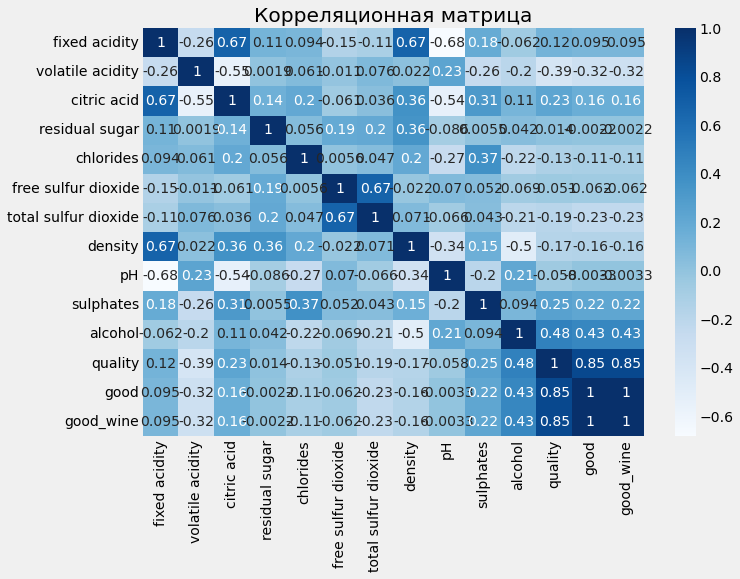

In [39]:
plt.figure(figsize = (10,7))
sns.heatmap(correlation, cmap = 'Blues', annot = True)
plt.title('Корреляционная матрица')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


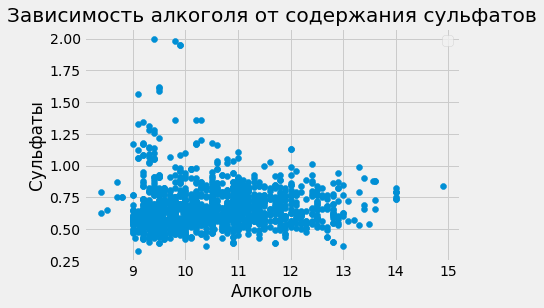

In [40]:

plt.scatter(df['alcohol'], df['sulphates'])


plt.title('Зависимость алкоголя от содержания сульфатов')
plt.xlabel('Алкоголь')
plt.ylabel('Сульфаты')
plt.legend()

plt.show()

In [26]:
df['good_wine'] = df['good'] > 0
data = df[['good_wine','fixed acidity', 'density']]
data.head()

,good_wine,fixed acidity,density
0,False,7.4,0.9978
1,False,7.8,0.9968
2,False,7.8,0.9970
3,True,11.2,0.9980
4,False,7.4,0.9978


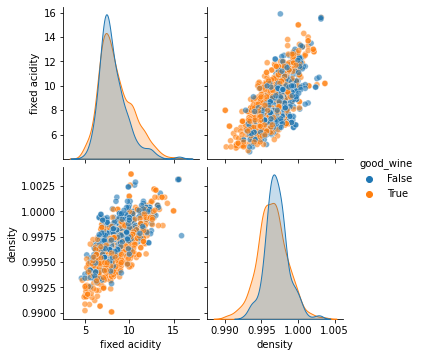

In [28]:
sns.pairplot(data, hue = 'good_wine', plot_kws = {'alpha': 0.6})

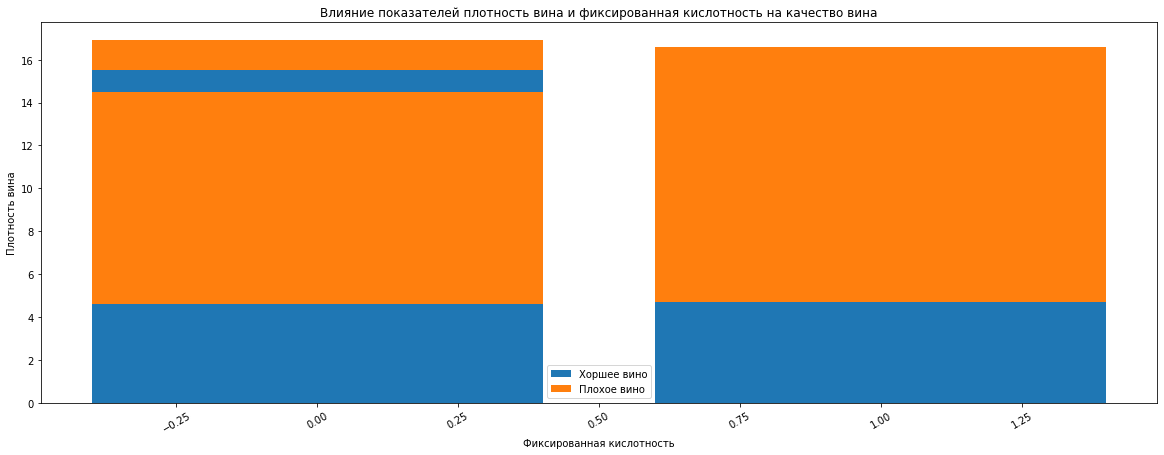

In [33]:
plt.figure(figsize = (20,7))

plt.bar(data['good_wine'], data['fixed acidity'])
plt.bar(data['good_wine'], data['density'], bottom = data['fixed acidity'])

plt.title('Влияние показателей плотность вина и фиксированная кислотность на качество вина')
plt.xlabel('Фиксированная кислотность')
plt.ylabel('Плотность вина')
plt.legend(['Хоршее вино','Плохое вино'])
plt.xticks( rotation = 30)


plt.show()